[Lab 3](https://nymph332088.github.io/CIS4340/labassignments/Lab3/Lab3.pdf) 


# #4 Electric power consumption data

In [ ]:
!curl -Ok https://nymph332088.github.io/CIS4340/labassignments/Lab3/household_power_consumption.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.6M  100 19.6M    0     0   116M      0 --:--:-- --:--:-- --:--:--  116M


In [ ]:
!unzip -o household_power_consumption.zip > /dev/null

In [ ]:
!head household_power_consumption.txt

Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
16/12/2006;17:24:00;4.216;0.418;234.840;18.400;0.000;1.000;17.000
16/12/2006;17:25:00;5.360;0.436;233.630;23.000;0.000;1.000;16.000
16/12/2006;17:26:00;5.374;0.498;233.290;23.000;0.000;2.000;17.000
16/12/2006;17:27:00;5.388;0.502;233.740;23.000;0.000;1.000;17.000
16/12/2006;17:28:00;3.666;0.528;235.680;15.800;0.000;1.000;17.000
16/12/2006;17:29:00;3.520;0.522;235.020;15.000;0.000;2.000;17.000
16/12/2006;17:30:00;3.702;0.520;235.090;15.800;0.000;1.000;17.000
16/12/2006;17:31:00;3.700;0.520;235.220;15.800;0.000;1.000;17.000
16/12/2006;17:32:00;3.668;0.510;233.990;15.800;0.000;1.000;17.000


Theo mô tả dữ liệu, các thuộc tính của mỗi dòng dữ liệu này bao gồm:
-	Date/Time: 2 thuộc tính ngày tháng của mỗi bản ghi.
-	Global_active_power: Công suất tiêu thụ điện năng toàn phần (đơn vị trung bình theo phút)
-	Global_reactive_power: Công suất hoàn trả điện năng toàn phần (đơn vị trung bình theo phút)
-	Voltage: Giá trị điện áp (tính theo trung bình phút)
-	Global intensity: Cường độ dòng điện toàn phần (tính theo trung bình phút)
-	Sub_metering_1: Bộ đo năng lượng điện tiêu thụ (Wh) của nhà bếp, năng lượng sử dụng ở đây bao gồm chủ yếu là máy rửa chén, lò nướng và lò vi sóng. 
-	Sub_metering_2: Bộ đo năng lượng điện tiêu thụ (Wh) của phòng giặt ủi, với chủ yếu là máy giặt, máy ủi, tủ lạnh và một bóng đèn.
-	Sub_metering_3: Bộ đo năng lượng điện tiêu thụ (Wh) của một máy nước nóng và một máy điều hòa.


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

## Đọc và tiền xử lý dữ liệu

In [ ]:
df = pd.read_csv('household_power_consumption.txt', delimiter=';')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


Các giá trị bị thiếu (_missing value_) được biểu diễn bằng kí hiệu `?`, ta sẽ replace về giá trị `NaN` để pandas dễ thao tác hơn.

In [ ]:
df.replace('?', np.nan, inplace=True)

Trong phạm vi bài tập này chỉ dùng dữ liệu trong 2 ngày gồm 01/02/2007 và 02/02/2007. 

In [ ]:
filtered_df = df[(df['Date'] == '1/2/2007') | (df['Date'] == '2/2/2007')]

Ta thấy cột `Date` và cột `Time` đang tách rời nhau, ta sẽ gộp lại thành một cột mang tên `DateTime` để dễ sử dụng hơn.

In [ ]:
trans_df = pd.concat([filtered_df, pd.to_datetime(filtered_df.apply(lambda r: f'{r.Date} {r.Time}', axis=1).rename('DateTime'), dayfirst=True)], axis=1)
trans_df.drop(['Date', 'Time'], axis=1, inplace=True)
trans_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
66636,0.326,0.128,243.150,1.400,0.000,0.000,0.0,2007-02-01 00:00:00
66637,0.326,0.130,243.320,1.400,0.000,0.000,0.0,2007-02-01 00:01:00
66638,0.324,0.132,243.510,1.400,0.000,0.000,0.0,2007-02-01 00:02:00
66639,0.324,0.134,243.900,1.400,0.000,0.000,0.0,2007-02-01 00:03:00
66640,0.322,0.130,243.160,1.400,0.000,0.000,0.0,2007-02-01 00:04:00


In [ ]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2880 entries, 66636 to 69515
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Global_active_power    2880 non-null   object        
 1   Global_reactive_power  2880 non-null   object        
 2   Voltage                2880 non-null   object        
 3   Global_intensity       2880 non-null   object        
 4   Sub_metering_1         2880 non-null   object        
 5   Sub_metering_2         2880 non-null   object        
 6   Sub_metering_3         2880 non-null   float64       
 7   DateTime               2880 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 202.5+ KB


Vì kí hiệu `?` thay thế cho giá trị thiếu ở trên mà dữ liệu này đọc chưa đúng kiểu dữ liệu cho các thuộc tính, vì vậy ta sẽ ép kiểu lại:

In [ ]:
wk_df = trans_df.astype({'Global_active_power': 'float', 'Global_reactive_power': 'float', 
           'Voltage': 'float', 'Global_intensity': 'float',
           'Sub_metering_1': 'float', 'Sub_metering_2': 'float'})

In [ ]:
wk_df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000
mean,1.212672,0.100627,240.363264,5.101667,0.406250,0.257639,8.501042
std,1.051519,0.093197,2.494777,4.395368,3.654527,0.554383,8.730857
min,0.220000,0.000000,233.050000,1.000000,0.000000,0.000000,0.000000
25%,0.320000,0.000000,238.437500,1.400000,0.000000,0.000000,0.000000
50%,1.060000,0.104000,240.555000,4.600000,0.000000,0.000000,0.000000
75%,1.688500,0.144000,242.440000,7.000000,0.000000,0.000000,17.000000
max,7.482000,0.500000,246.570000,32.000000,38.000000,2.000000,19.000000


In [ ]:
wk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2880 entries, 66636 to 69515
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Global_active_power    2880 non-null   float64       
 1   Global_reactive_power  2880 non-null   float64       
 2   Voltage                2880 non-null   float64       
 3   Global_intensity       2880 non-null   float64       
 4   Sub_metering_1         2880 non-null   float64       
 5   Sub_metering_2         2880 non-null   float64       
 6   Sub_metering_3         2880 non-null   float64       
 7   DateTime               2880 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 202.5 KB


Kiểm tra xem có dữ liệu thiếu không, nếu có sẽ ảnh hưởng nhiều tới các biểu đồ. 

In [ ]:
wk_df.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
DateTime                 0
dtype: int64

Như vậy không có giá trị thiếu trong 2 ngày đang xét này. 

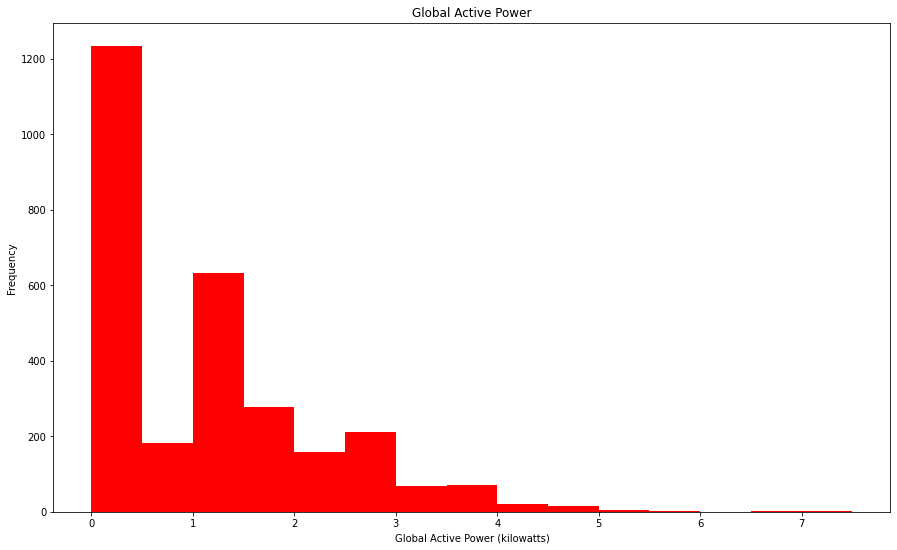

In [ ]:
plt.figure(figsize=(15, 9))
binwidth = 0.5
ap_max = wk_df.Global_active_power.max()

plt.hist(wk_df.Global_active_power, bins=np.arange(0, ap_max + binwidth, binwidth), facecolor='r')
plt.xlabel('Global Active Power (kilowatts)')
plt.ylabel('Frequency')
plt.title('Global Active Power')

plt.savefig('plot1.png')

Làm bộ formatter để định dạng lại trục X của dữ liệu thời gian:

In [ ]:
from matplotlib.dates import AutoDateLocator, ConciseDateFormatter

locator = AutoDateLocator(minticks=3, maxticks=7)
formatter = ConciseDateFormatter(locator)

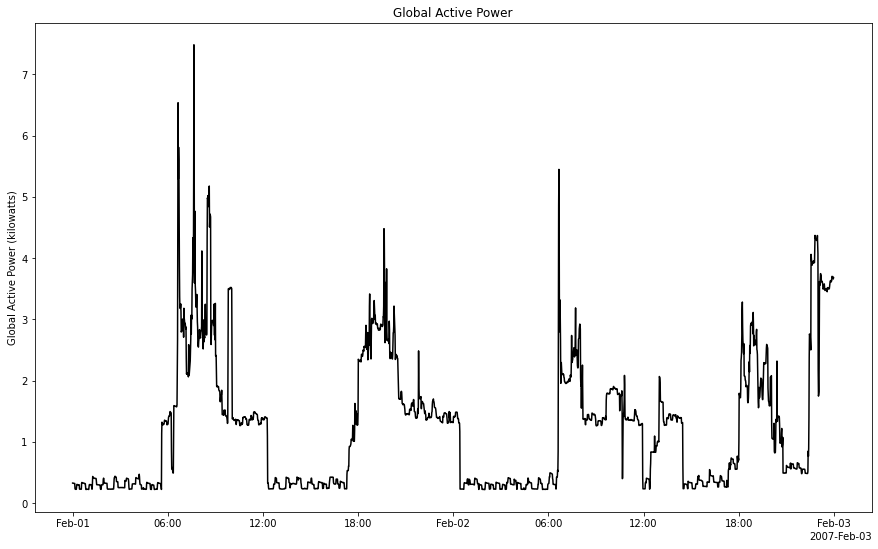

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot('DateTime', 'Global_active_power', data= wk_df, c='black')

ax.set_title('Global Active Power')
ax.set_ylabel('Global Active Power (kilowatts)')

ax.xaxis.set_major_formatter(formatter)
plt.savefig('plot2.png')

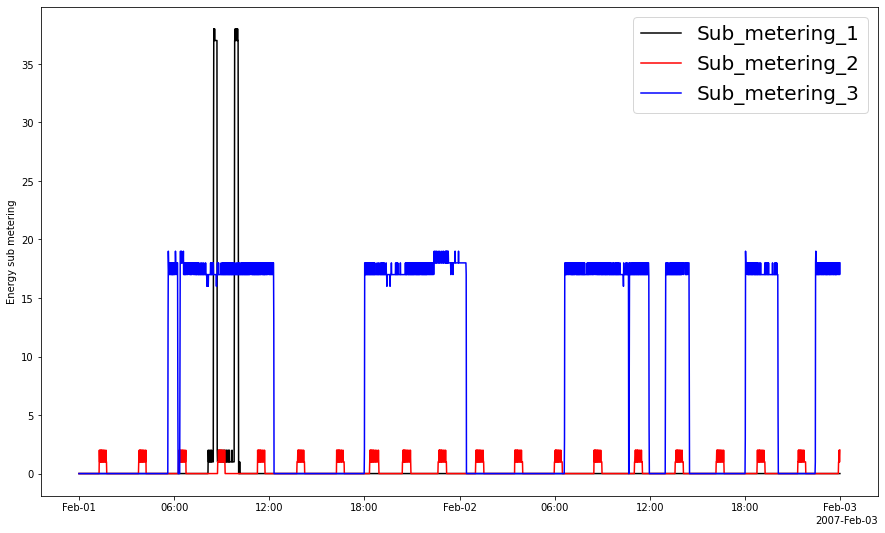

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9))

ax.plot(wk_df.DateTime, wk_df.Sub_metering_1, label='Sub_metering_1', c='black')
ax.plot(wk_df.DateTime, wk_df.Sub_metering_2, label='Sub_metering_2', c= 'r')
ax.plot(wk_df.DateTime, wk_df.Sub_metering_3, label='Sub_metering_3', c='b')
ax.set_ylabel('Energy sub metering')

ax.xaxis.set_major_formatter(formatter)
ax.legend(title='', fontsize=20)

plt.savefig('plot3.png')

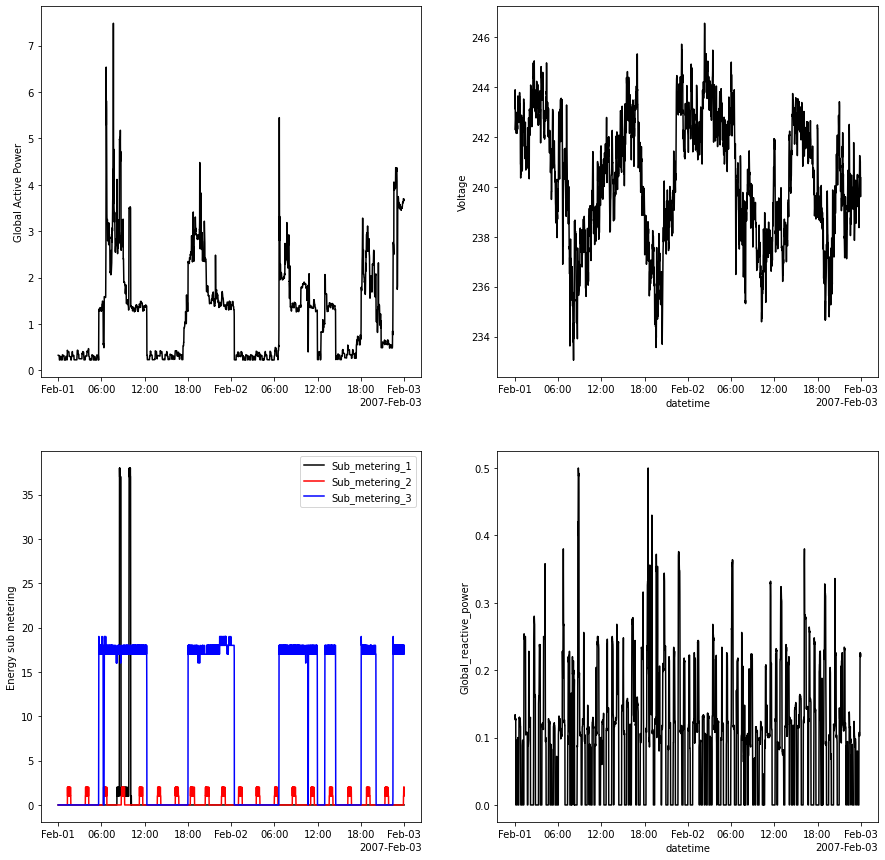

In [ ]:
f, ax = plt.subplots(2, 2, figsize=(15, 15))

ax[0, 0].plot(wk_df.DateTime, wk_df.Global_active_power, c='black')
ax[0, 0].xaxis.set_major_formatter(formatter)
ax[0, 0].set_ylabel('Global Active Power')

ax[0, 1].plot(wk_df.DateTime, wk_df.Voltage, c='black')
ax[0, 1].xaxis.set_major_formatter(formatter)
ax[0, 1].set_ylabel('Voltage')
ax[0, 1].set_xlabel('datetime')

ax[1, 0].plot(wk_df.DateTime, wk_df.Sub_metering_1, label='Sub_metering_1', c='black')
ax[1, 0].plot(wk_df.DateTime, wk_df.Sub_metering_2, label='Sub_metering_2', c= 'r')
ax[1, 0].plot(wk_df.DateTime, wk_df.Sub_metering_3, label='Sub_metering_3', c='b')
ax[1, 0].xaxis.set_major_formatter(formatter)
ax[1, 0].set_ylabel('Energy sub metering')
ax[1, 0].legend()

ax[1, 1].plot(wk_df.DateTime, wk_df.Global_reactive_power, c='black')
ax[1, 1].xaxis.set_major_formatter(formatter)
ax[1, 1].set_ylabel('Global_reactive_power')
ax[1, 1].set_xlabel('datetime')

plt.savefig('plot4.png')

**Viết một câu chuyện:** 

Bối cảnh được lấy ở một hộ gia đình bình thường ở Mỹ với điều kiện kinh tế khá giả. Họ có rất nhiều thiết bị tiêu thụ điện nằm ở nhiều phòng khác nhau. Phòng bếp của họ có máy rửa bát, lò nướng, lò vi sóng. Phòng giặt là với máy giặt, máy sấy, tủ lạnh và đèn. Ngoài ra họ còn có bình nóng lạnh và điều hòa, các thiết bị kể trên đều tiêu thụ điện ở mức cao (trừ đèn), chẳng hạn một lò nướng thông thường tiêu thụ khoảng 2.3 kWh hay một máy giặt thông thường tiêu thụ khoảng 2.25 kWh và nhiều thiết bị khác. Ta có thể ngầm suy đoán được về giờ giấc sinh hoạt của gia đình thông qua lượng điện tiêu thụ tổng trong ngày trong biểu đồ tổng hợp Plot 4.  

Ngày 1/2/2007 là thứ 5, một ngày làm việc bình thường, mọi người bắt đầu thức giấc vào 6 giờ kém, đánh răng, tắm rửa (dùng bình nóng lạnh). Sau đó cả nhà quyết định sẽ vào bếp tự làm bữa sáng thật ngon miệng với vài chiếc cupcake nóng hổi. Bữa sáng xong xuôi, cả gia đình trở về phòng đọc sách thư giãn, và tất nhiên thời gian ở nhà sẽ dùng máy điều hòa. Điều đó khiến cho lượng điện sử dụng của gia đình này vào buổi sáng khá cao. Đến buổi chiều, tầm sau 12h thì cả gia đình ra ngoài để đi làm nên lượng điện tiêu thụ giảm xuống, chỉ còn lại một chút để duy trì chiếc tủ lạnh theo chu kì đều đặn (vì là tủ lạnh tiết kiệm điện nên không làm lạnh liên tục). Buổi tối đến, họ trở về nhà, tiếp tục sử dụng điều hòa cho đến khi đi ngủ.  

Ngày 2/2/2007, cũng như thường lệ, họ có một buổi sáng ở nhà và tiêu thụ điện năng giống hôm trước ngoại trừ việc hôm nay họ chỉ cần chiên vài quả trứng và làm vài ly sữa cho bữa sáng, nên bếp không ghi nhận tiêu thụ điện năng (vì họ dùng bếp gas). Mặc dù có phòng giặt ủi, tuy nhiên số liệu ghi nhận của nhóm thiết bị này lại nói rằng bọn họ có sở thích giặt đồ ở ngoài hơn là ở nhà, hoặc là cách vài ngày mới giặt đồ một lần, nên trong 2 ngày đang xét này thì không ghi nhận được. Tuy nhiên đến buổi chiều thì có một người ở nhà nên vẫn bật điều hòa và tiêu thụ điện năng. Buổi tối đến, cả gia đình về nhà, nhanh chóng chuẩn bị để một lát 20h ra ngoài chơi, tại sao lại không đi dạo một vòng hóng mát khi ngày mai là ngày nghỉ cơ chứ! Họ ra ngoài đến 22h thì trở về và tiếp tục sinh hoạt nghỉ ngơi cho đến nửa đêm.  

Trên đây là một câu chuyện hư cấu được kể dựa trên dữ liệu thu thập sử dụng điện của hộ gia đình trên trong 2 ngày. Mặc dù vậy, nó hoàn toàn có khả năng xảy ra bởi vì xã hội ngày nay ngày càng hiện đại, con người lại ngày càng phụ thuộc vào các thiết bị công nghệ và tất nhiên cần đến điện năng để hoạt động. Chính vì vậy ta rất dễ dàng để dự đoán hay thống kê lịch sinh hoạt của các hộ gia đình chỉ dựa trên cách hành xử của họ đối với các thiết bị điện như ở câu chuyện kể trên.
